# 합성곱 신경망의 시각화 (파이토치)

In [6]:
import torch
import torch.nn as nn

model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(1, 32, kernel_size=3, padding='same'))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(2))
model.add_module('conv2', nn.Conv2d(32, 64, kernel_size=3, padding='same'))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(2))
model.add_module('flatten', nn.Flatten())
model.add_module('dense1', nn.Linear(3136,100))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(0.3))
model.add_module('dense2', nn.Linear(100, 10))

In [7]:
model.load_state_dict(torch.load('best_cnn_model.pt'))

<All keys matched successfully>

In [8]:
layers = [layer for layer in model.children()]

In [9]:
print(layers[0])

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)


In [10]:
model[0]

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [11]:
for name, layer in model.named_children():
    print(f"{name:10s}", layer)

conv1      Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu1      ReLU()
pool1      MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
conv2      Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu2      ReLU()
pool2      MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
flatten    Flatten(start_dim=1, end_dim=-1)
dense1     Linear(in_features=3136, out_features=100, bias=True)
relu3      ReLU()
dropout    Dropout(p=0.3, inplace=False)
dense2     Linear(in_features=100, out_features=10, bias=True)


In [12]:
model.conv1

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [13]:
conv_weights = model.conv1.weight.data
print(conv_weights.mean(), conv_weights.std())

tensor(-0.0445) tensor(0.3646)


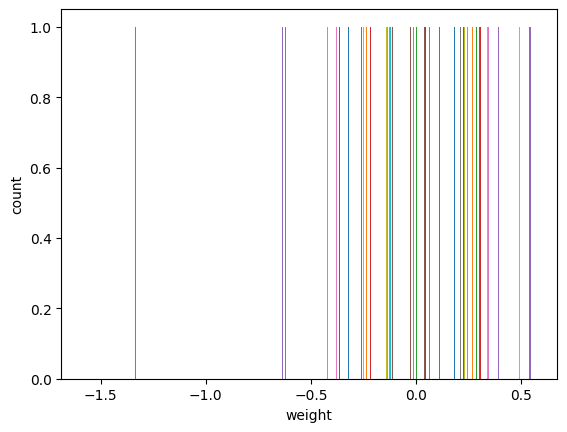

In [14]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [15]:
print(conv_weights.shape)

torch.Size([32, 1, 3, 3])


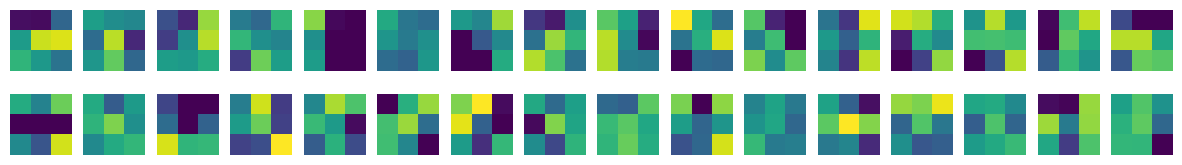

In [17]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[i*16 + j,0,:,:], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [18]:
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
train_input = fm_train.data

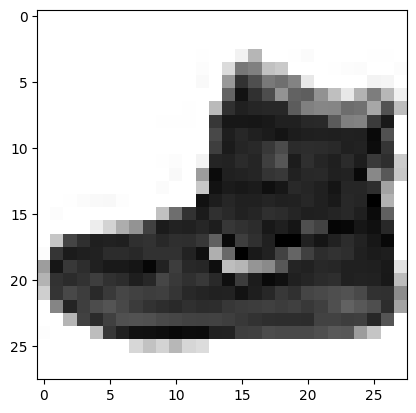

In [19]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [23]:
ankle_boot = train_input[0:1].reshape(1, 1, 28, 28) / 255.0

model.eval()
with torch.no_grad():
    feature_maps = model.conv1(ankle_boot)
    feature_maps = model.relu1(feature_maps)

In [24]:
print(feature_maps.shape)

torch.Size([1, 32, 28, 28])


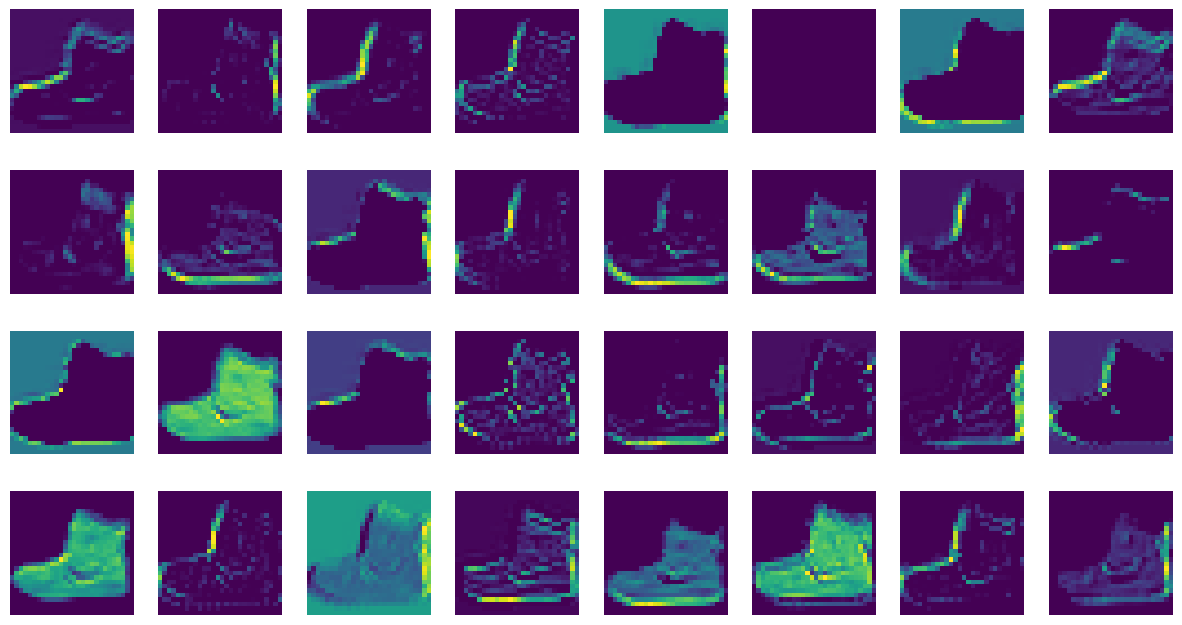

In [25]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,i*8 + j,:,:])
        axs[i, j].axis('off')
plt.show()

In [26]:
model.eval()
with torch.no_grad():
    feature_maps = model.conv1(ankle_boot)
    feature_maps = model.relu1(feature_maps)
    feature_maps = model.pool1(feature_maps)
    feature_maps = model.conv2(feature_maps)
    feature_maps = model.relu2(feature_maps)

In [27]:
model.eval()
x = ankle_boot
with torch.no_grad():
    for name, layer in model.named_children():
        x = layer(x)
        if name == 'relu2':
            break
feature_maps = x

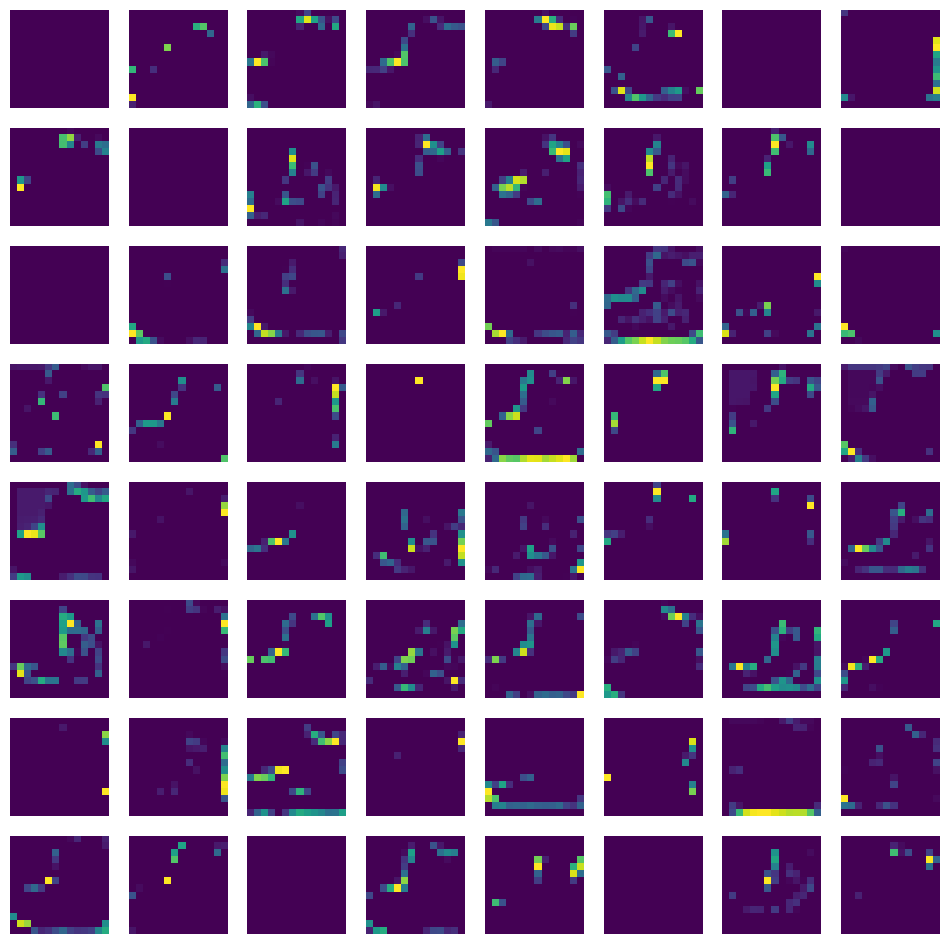

In [28]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,i*8 + j,:,:])
        axs[i, j].axis('off')
plt.show()